<h1 style='color:red'> Clustering - Unsupervised Learning - KMeans

For a typical online retail trader, identify clusters of customers using KMeans and Heirarchical Clustering

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, statsmodels.api as sm, sklearn, datetime as dt

# Step-1: Read and understand the data

In [2]:
retail_df = pd.read_csv('Online+Retail.csv', encoding='ISO-8859-1')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
retail_df.shape

(541909, 8)

In [4]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Step-2: Clean the data

In [7]:
round(retail_df.isna().sum()/retail_df.shape[0]*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
retail_df.dropna(inplace=True)
retail_df.shape

(406829, 8)

In [9]:
retail_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Step-3: Data Preparation

- R: Recency (number of days since last purchase)
- F: Frequency (number of transactions done in the period covered by this dataset)
- M: Monetary (total revenue contributed by the customer

In [10]:
# New column with amount of the order
retail_df['Amount'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [11]:
# M: Monetary
monetary_df = retail_df.groupby('CustomerID')['Amount'].sum()
monetary_df = monetary_df.reset_index()
print (monetary_df.shape, retail_df.CustomerID.nunique())
monetary_df.head()

(4372, 2) 4372


,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [12]:
# M: Frequency
frequency_df = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency_df = frequency_df.reset_index()
print (frequency_df.shape)
frequency_df.head()

(4372, 2)


,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [13]:
# New column with date
retail_df['DateCol'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M')
max_date = max(retail_df.DateCol)
retail_df['TimeDiff'] = max_date - retail_df['DateCol']
recency_df = retail_df.groupby('CustomerID')['TimeDiff'].min()
recency_df = recency_df.reset_index()
print (recency_df.shape)
recency_df.head()

(4372, 2)


,CustomerID,TimeDiff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [14]:
# Group
RFM_df = pd.merge(recency_df, frequency_df, on='CustomerID', how='inner')
RFM_df = pd.merge(RFM_df,monetary_df,on='CustomerID', how='inner')
RFM_df.columns = ['CustomerID', 'Recency', 'Frequency', 'MonetaryVal']
RFM_df['CustomerID'] = RFM_df['CustomerID'].astype('int')
RFM_df['Recency'] = RFM_df['Recency'].dt.days
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryVal
0,12346,325,2,0.00
1,12347,1,182,4310.00
2,12348,74,31,1797.24
3,12349,18,73,1757.55
4,12350,309,17,334.40


In [15]:
RFM_df.describe()

,CustomerID,Recency,Frequency,MonetaryVal
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.047118,93.053294,1898.459701
std,1722.390705,100.765435,232.471608,8219.345141
min,12346.000000,0.000000,1.000000,-4287.630000
25%,13812.750000,16.000000,17.000000,293.362500
50%,15300.500000,49.000000,42.000000,648.075000
75%,16778.250000,142.000000,102.000000,1611.725000
max,18287.000000,373.000000,7983.000000,279489.020000


In [16]:
RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   4372 non-null   int32  
 1   Recency      4372 non-null   int64  
 2   Frequency    4372 non-null   int64  
 3   MonetaryVal  4372 non-null   float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 153.7 KB


# Step-4: Outlier Treatment, Rescaling, Hopkins Statistic

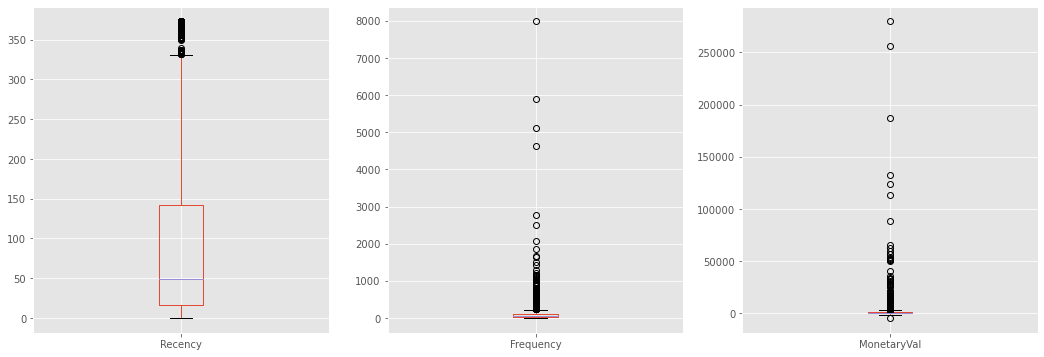

In [17]:
# Outlier
plt.style.use('ggplot')
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
RFM_df.Recency.plot.box()

plt.subplot(1,3,2)
RFM_df.Frequency.plot.box()

plt.subplot(1,3,3)
RFM_df.MonetaryVal.plot.box()
plt.show()

Statistically speaking, there are outliers in the data. But for now, we keep them since we dont know domain specific information about outliers. Maybe at a later time this can be analyzed

In [18]:
RFM_df.columns

Index(['CustomerID', 'Recency', 'Frequency', 'MonetaryVal'], dtype='object')

In [19]:
# Remove Statistical Outliers
lower_bound = 0.05
upper_bound = 0.95
par_list = ['MonetaryVal', 'Recency', 'Frequency']

for col_name in par_list:
    print (col_name)
    Q1 = RFM_df[col_name].quantile(lower_bound)
    Q3 = RFM_df[col_name].quantile(upper_bound)
    IQR = Q3 - Q1
    print (IQR)
    RFM_df = RFM_df[(RFM_df[col_name] >= (Q1 - 1.5 * IQR)) & (RFM_df[col_name] <= (Q3 + 1.5 * IQR))]

MonetaryVal
5523.8654999999935
Recency
310.0
Frequency
294.39999999999964


In [20]:
RFM_df.describe()

,CustomerID,Recency,Frequency,MonetaryVal
count,4293.000000,4293.000000,4293.000000,4293.000000
mean,15299.900769,92.548567,77.483578,1270.411464
std,1722.942628,101.006845,100.270448,1755.551155
min,12346.000000,0.000000,1.000000,-4287.630000
25%,13811.000000,17.000000,17.000000,289.360000
50%,15304.000000,50.000000,40.000000,632.970000
75%,16779.000000,145.000000,97.000000,1518.430000
max,18287.000000,373.000000,718.000000,13677.590000


In [21]:
# Rescaling
rfm_df = RFM_df[['Recency', 'Frequency', 'MonetaryVal']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled_df = scaler.fit_transform(rfm_df)
rfm_scaled_df.shape

(4293, 3)

In [22]:
# Convert nparray into dataframe
rfm_scaled_df = pd.DataFrame(rfm_scaled_df)
rfm_scaled_df.columns = ['Recency', 'Frequency', 'MonetaryVal']

In [23]:
# Hopkins Statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(rfm_scaled_df)

0.9497540842878497

# Step-5: Modeling

In [24]:
rfm_scaled_df.head()

,Recency,Frequency,MonetaryVal
0,2.301611,-0.752888,-0.723738
1,-0.906466,1.042467,1.731617
2,-0.183658,-0.463636,0.300128
3,-0.738141,-0.044720,0.277517
4,2.143188,-0.603275,-0.533235


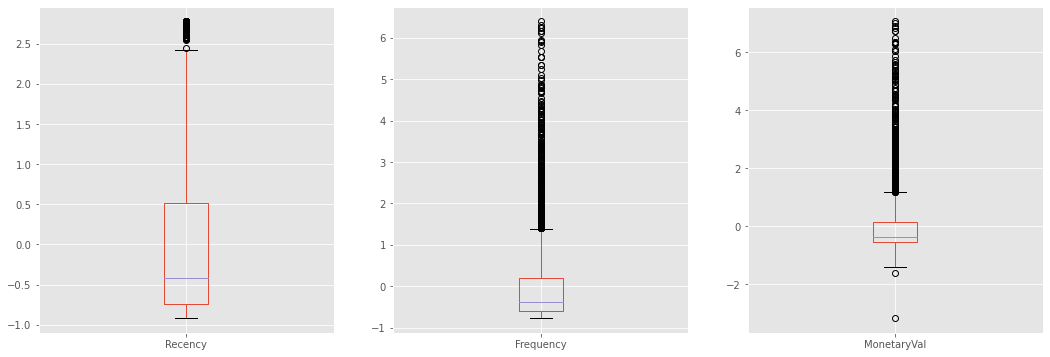

In [25]:
# Outlier
plt.style.use('ggplot')
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
rfm_scaled_df.Recency.plot.box()

plt.subplot(1,3,2)
rfm_scaled_df.Frequency.plot.box()

plt.subplot(1,3,3)
rfm_scaled_df.MonetaryVal.plot.box()
plt.show()

In [26]:
# KMeans
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4, max_iter=50)
k_means.fit(rfm_scaled_df)
print (np.unique(k_means.labels_,return_counts=True))

(array([0, 1, 2, 3]), array([1035,  783,  226, 2249], dtype=int64))


In [27]:
k_means.cluster_centers_

array([[ 1.57421197, -0.51807487, -0.50304719],
       [-0.62090614,  0.85317222,  0.77410856],
       [-0.74055023,  2.94307943,  2.98569751],
       [-0.4334541 , -0.35705355, -0.34051308]])

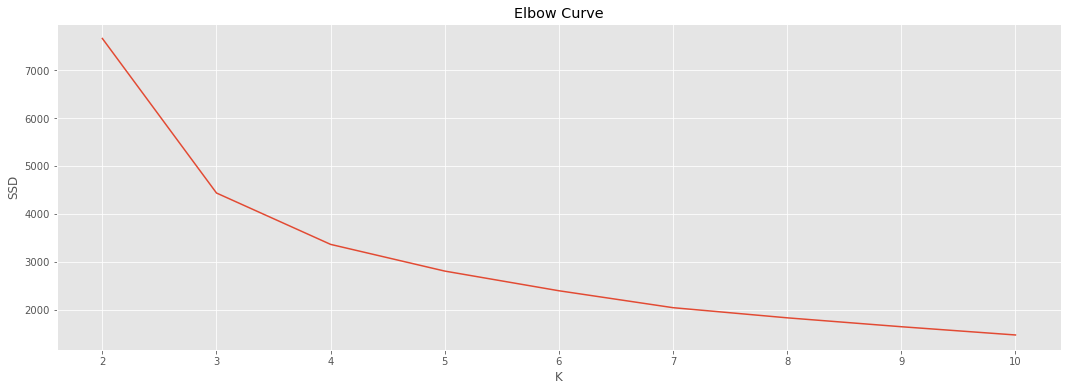

In [28]:
# Elbow Curve
K_ini = 2
K_fin = 10

ssd_list = []
from sklearn.cluster import KMeans
for numK in range(K_ini, K_fin+1,1):
    k_means = KMeans(n_clusters=numK, max_iter=100)
    k_means.fit(rfm_scaled_df)
    ssd_list.append(k_means.inertia_)

plt.style.use('ggplot')
plt.figure(figsize=(18,6))
plt.plot(ssd_list)
plt.title('Elbow Curve') 
plt.xticks(np.arange(len(range(K_ini, K_fin+1,1))), range(K_ini, K_fin+1,1))
plt.xlabel('K')
plt.ylabel('SSD')
plt.show()

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of (inter cluster distance)

$q$ is the mean distance to all the points in its own cluster (intra cluster distance)

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

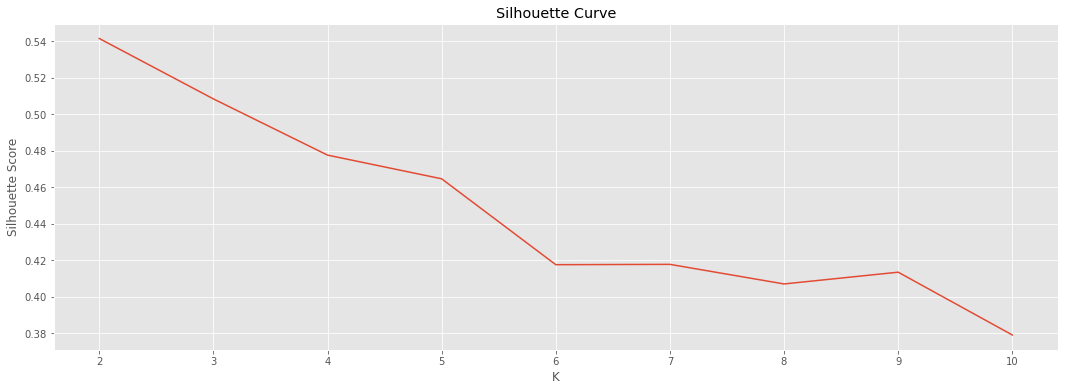

In [29]:
# Silhouette Curve
K_ini = 2
K_fin = 10

sil_avg = []
from sklearn.metrics import silhouette_score
for numK in range(K_ini, K_fin+1,1):
    k_means = KMeans(n_clusters=numK, max_iter=100)
    k_means.fit(rfm_scaled_df)
    sil_avg.append(silhouette_score(rfm_scaled_df,k_means.labels_))

plt.style.use('ggplot')
plt.figure(figsize=(18,6))
plt.plot(sil_avg)
plt.title('Silhouette Curve') 
plt.xticks(np.arange(len(range(K_ini, K_fin+1,1))), range(K_ini, K_fin+1,1))
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [30]:
# Final KMeans Model
fin_K_val = 3
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=fin_K_val, max_iter=100, random_state=10)
k_means.fit(rfm_scaled_df)
print (np.unique(k_means.labels_,return_counts=True))

(array([0, 1, 2]), array([2726,  499, 1068], dtype=int64))


In [31]:
# Assign Cluster Labels to the relevant DF
RFM_df['ClusterID']=k_means.labels_
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryVal,ClusterID
0,12346,325,2,0.00,2
1,12347,1,182,4310.00,1
2,12348,74,31,1797.24,0
3,12349,18,73,1757.55,0
4,12350,309,17,334.40,2


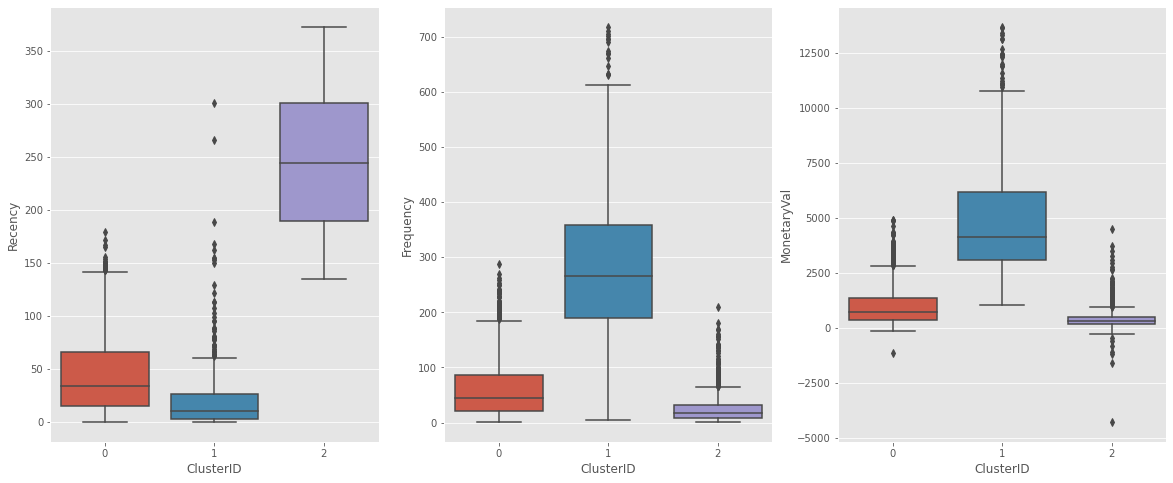

In [32]:
# Outlier
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(data=RFM_df, x='ClusterID', y='Recency')

plt.subplot(1,3,2)
sns.boxplot(data=RFM_df, x='ClusterID', y='Frequency')

plt.subplot(1,3,3)
sns.boxplot(data=RFM_df, x='ClusterID', y='MonetaryVal')
plt.show()

<h1 style='color:red'> Clustering - Unsupervised Learning - Hierarchical

In [47]:
# Import libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [48]:
rfm_scaled_df.head()

,Recency,Frequency,MonetaryVal
0,2.301611,-0.752888,-0.723738
1,-0.906466,1.042467,1.731617
2,-0.183658,-0.463636,0.300128
3,-0.738141,-0.044720,0.277517
4,2.143188,-0.603275,-0.533235


In [49]:
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryVal,ClusterID
0,12346,325,2,0.00,2
1,12347,1,182,4310.00,1
2,12348,74,31,1797.24,0
3,12349,18,73,1757.55,0
4,12350,309,17,334.40,2


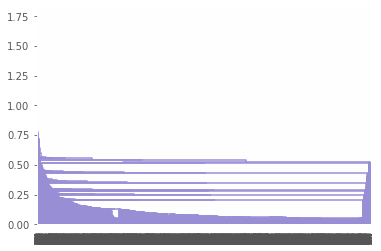

In [50]:
# Single Linkage (pretty much bullshit)
single_merge = linkage (rfm_scaled_df, method='single',metric='euclidean')
dendrogram(single_merge)
plt.show()

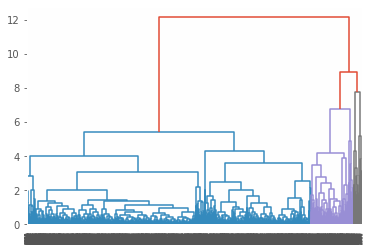

In [51]:
# Complete Linkage
complete_merge = linkage (rfm_scaled_df, method='complete',metric='euclidean')
dendrogram(complete_merge)
plt.show()

In [52]:
# Cuttree
cluster_label_HC = cut_tree(complete_merge, n_clusters=3).reshape(-1,)
cluster_label_HC

array([0, 1, 0, ..., 0, 0, 0])

In [53]:
RFM_df['ClusterLabels'] = cluster_label_HC
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryVal,ClusterID,ClusterLabels
0,12346,325,2,0.00,2,0
1,12347,1,182,4310.00,1,1
2,12348,74,31,1797.24,0,0
3,12349,18,73,1757.55,0,0
4,12350,309,17,334.40,2,0


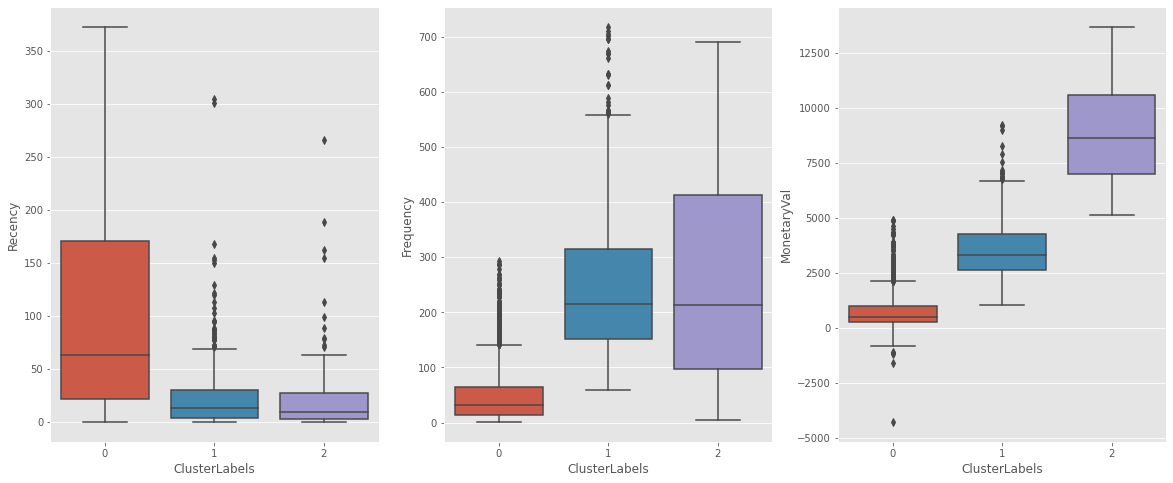

In [54]:
# Outlier
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(data=RFM_df, x='ClusterLabels', y='Recency')

plt.subplot(1,3,2)
sns.boxplot(data=RFM_df, x='ClusterLabels', y='Frequency')

plt.subplot(1,3,3)
sns.boxplot(data=RFM_df, x='ClusterLabels', y='MonetaryVal')
plt.show()

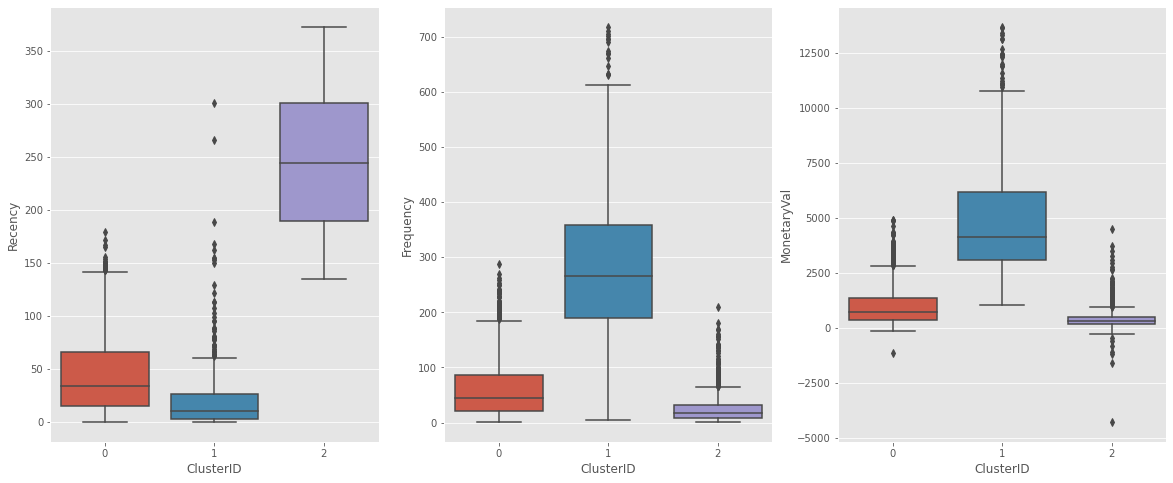

In [55]:
# Outlier
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(data=RFM_df, x='ClusterID', y='Recency')

plt.subplot(1,3,2)
sns.boxplot(data=RFM_df, x='ClusterID', y='Frequency')

plt.subplot(1,3,3)
sns.boxplot(data=RFM_df, x='ClusterID', y='MonetaryVal')
plt.show()